# Iris flower classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

## loading the data

In [2]:
data = pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.set_index('Id',inplace=True)

In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## label encoding

In [7]:
le=LabelEncoder()
data.Species=le.fit_transform(data.Species)

## visualizing the data

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

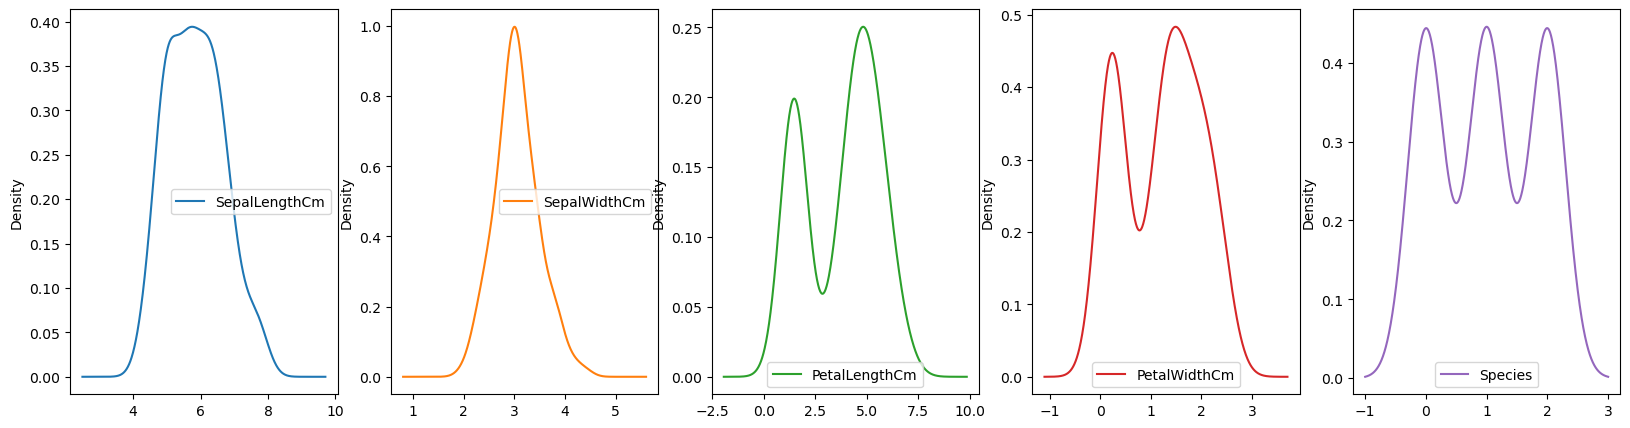

In [8]:
fig, ax=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
data.plot(kind="density",subplots=True,ax=ax)

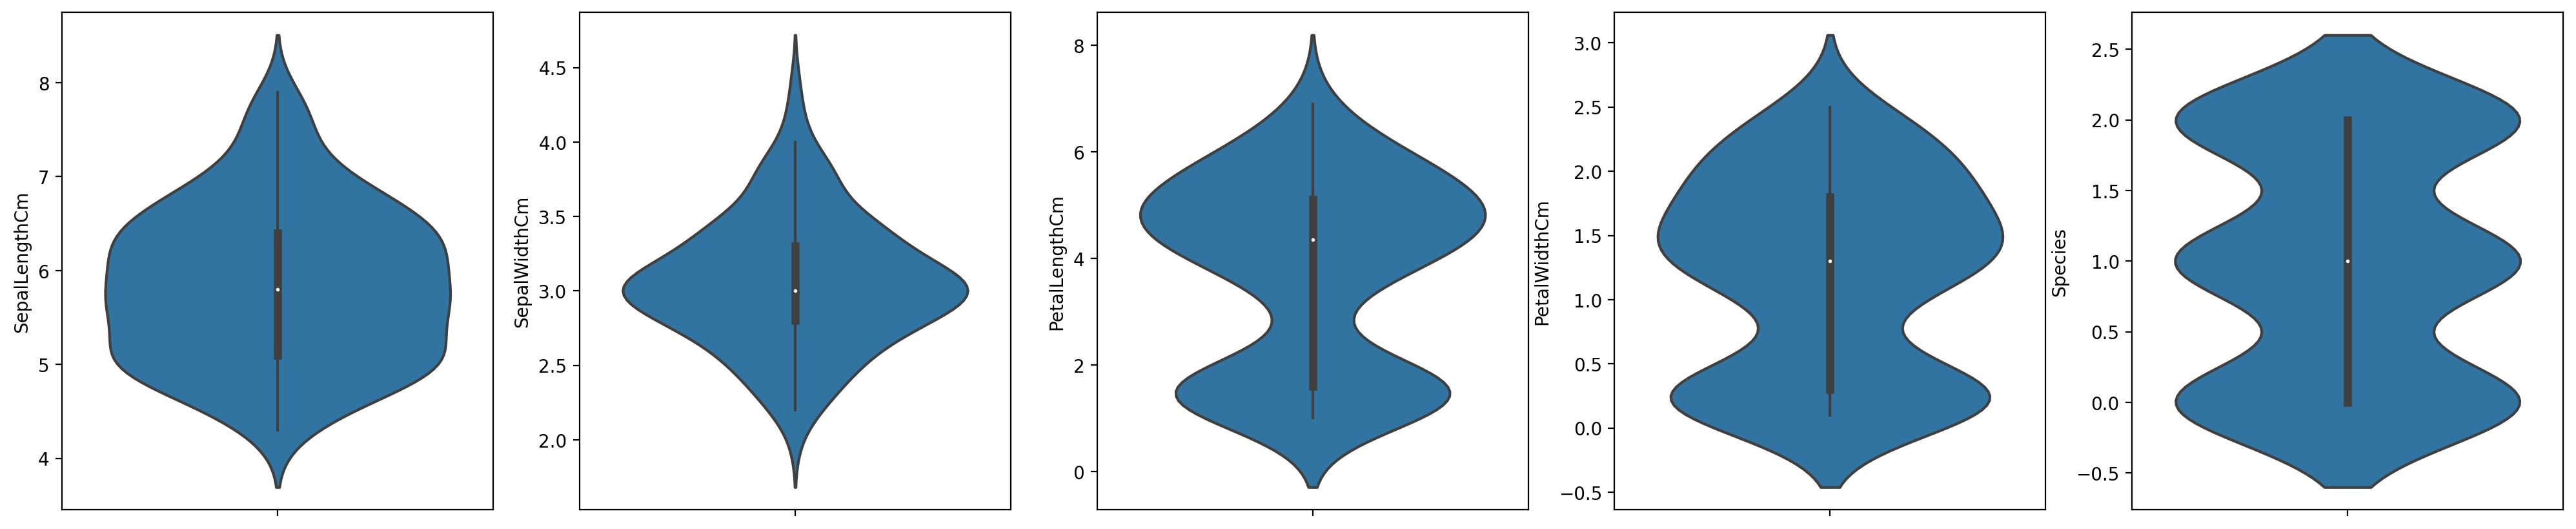

In [9]:
plt.figure(figsize=(25,5),dpi=200)
index=1
for i in data.keys():
    plt.subplot(1,5,index)
    sns.violinplot(data= data,y=i)
    index+=1
plt.show()
    

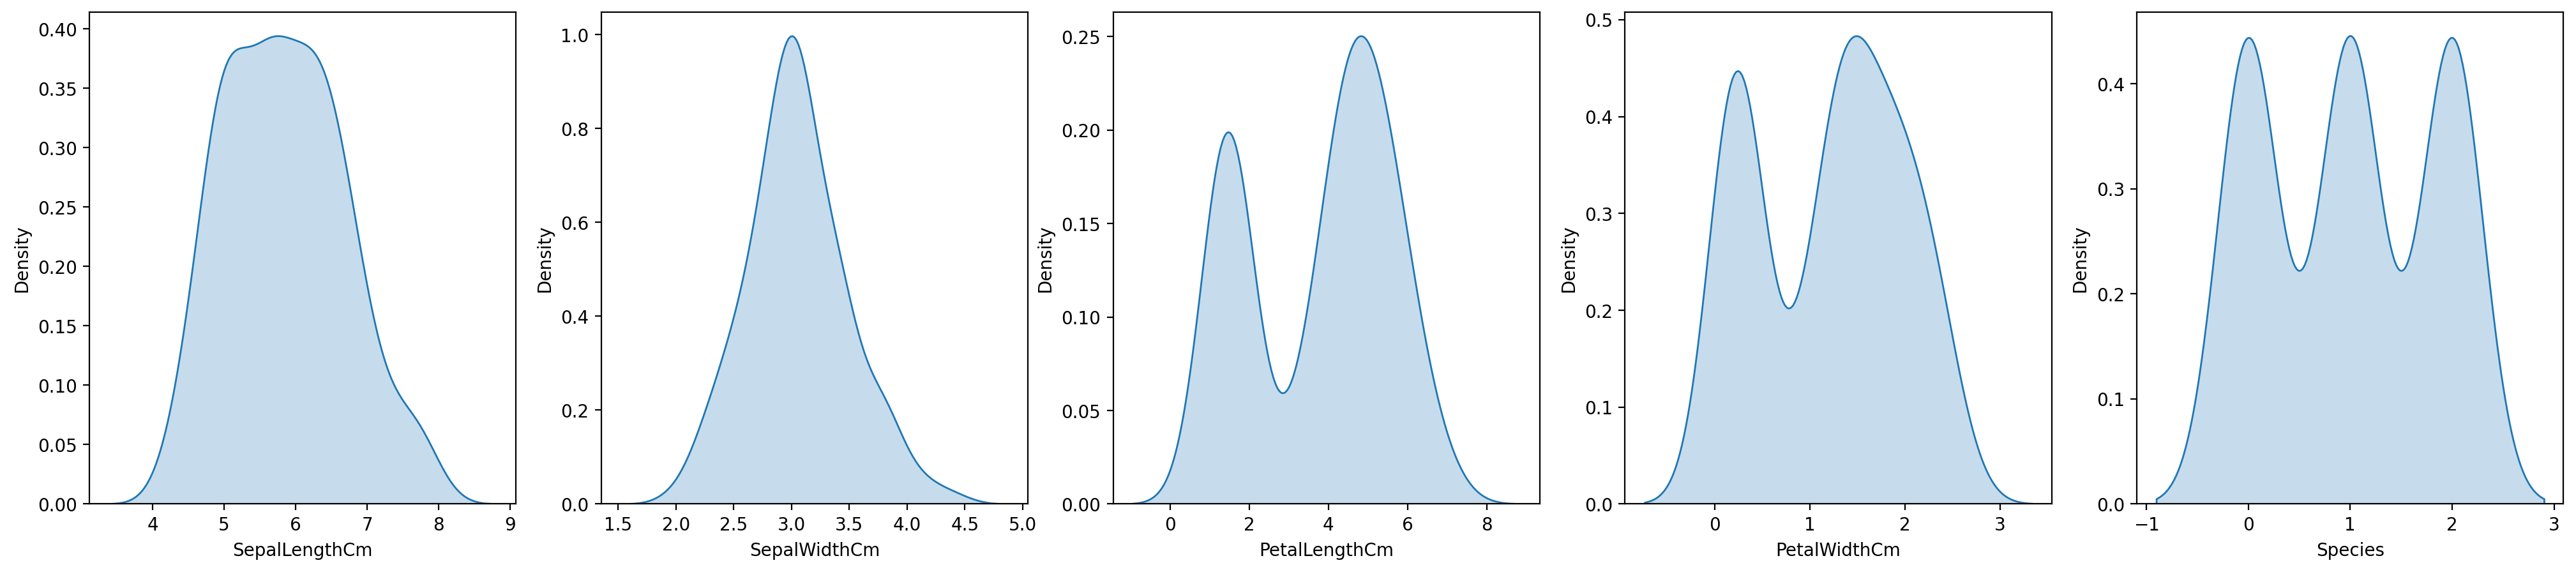

In [10]:
plt.figure(figsize=(25,5),dpi=200)
index=1
for i in data.keys():
    plt.subplot(1,5,index)
    sns.kdeplot(data[i],shade=True)
    index+=1
plt.show()

## splitting the data

In [11]:
x=data.drop(['Species'],axis=1)
y=data['Species']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


## model fitting

In [13]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

## prediction

In [14]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)*100

100.0